# Data Description
This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over 50K
| a year.
|
| First cited in:
| @inproceedings{kohavi-nbtree,
|    author={Ron Kohavi},
|    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
|           Decision-Tree Hybrid},
|    booktitle={Proceedings of the Second International Conference on
|               Knowledge Discovery and Data Mining},
|    year = 1996,
|    pages={to appear}}
|
| Error Accuracy reported as follows, after removal of unknowns from
|    train/test sets):
|    C4.5       : 84.46+-0.30
|    Naive-Bayes: 83.88+-0.30
|    NBTree     : 85.90+-0.28
|
|
| Following algorithms were later run with the following error rates,
|    all after removal of unknowns and using the original train/test split.
|    All these numbers are straight runs using MLC++ with default values.
|
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04
| 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
|
| Conversion of original data as follows:
| 1. Discretized agrossincome into two ranges with threshold 50,000.
| 2. Convert U.S. to US to avoid periods.
| 3. Convert Unknown to "?"
| 4. Run MLC++ GenCVFiles to generate data,test.
|
| Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US.  These are prepared monthly
| for us by Population Division here at the Census Bureau.  We use 3 sets of
| controls.
|  These are:
|          1.  A single cell estimate of the population 16+ for each state.
|          2.  Controls for Hispanic Origin by age and sex.
|          3.  Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights.  There is one important caveat to remember
| about this statement.  That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.


>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


#Load dataset

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1f2PGNDKmlhW92Qd5eRZ3Zw5lRz8zBYGE'
file_name= 'adult.csv'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(file_name)

# Step 1:Data collection

In [0]:
data=pd.read_csv(file_name, na_values=['?',' ?', '? '])


#Step 2:Data exploration

In [69]:
data

age  workclass  final-weight  ...  hours-per-week  native-country  salary
0       39          6         77516  ...              40              38       0
1       50          5         83311  ...              13              38       0
2       38          3        215646  ...              40              38       0
3       53          3        234721  ...              40              38       0
4       28          3        338409  ...              40               4       0
5       37          3        284582  ...              40              38       0
6       49          3        160187  ...              16              22       0
7       52          5        209642  ...              45              38       1
8       31          3         45781  ...              50              38       1
9       42          3        159449  ...              40              38       1
10      37          3        280464  ...              80              38       1
11      30          6        141297  ...              40              18       1
12      23          3        122272  ...              30              38       0
13      32          3        205019  ...              50              38       0
14      40          3        121772  ...              40              38       1
15      34          3        245487  ...              45              25       0
16      25          5        176756  ...              35              38       0
17      32          3        186824  ...              40              38       0
18      38          3         28887  ...              50              38       0
19      43          5        292175  ...              45              38       1
20      40          3        193524  ...              60              38       1
21      54          3        302146  ...              20              38       0
22      35          0         76845  ...              40              38       0
23      43          3        117037  ...              40              38       0
24      59          3        109015  ...              40              38       0
25      56          1        216851  ...              40              38       1
26      19          3        168294  ...              40              38       0
27      54         -1        180211  ...              60              34       1
28      39          3        367260  ...              80              38       0
29      49          3        193366  ...              40              38       0
...    ...        ...           ...  ...             ...             ...     ...
32531   30         -1         33811  ...              99              38       0
32532   34          3        204461  ...              60              38       1
32533   54          3        337992  ...              50              23       1
32534   37          3        179137  ...              39              38       0
32535   22          3        325033  ...              35              38       0
32536   34          3        160216  ...              55              38       1
32537   30          3        345898  ...              46              38       0
32538   38          3        139180  ...              45              38       1
32539   71         -1        287372  ...              10              38       1
32540   45          6        252208  ...              40              38       0
32541   41         -1        202822  ...              32              38       0
32542   72         -1        129912  ...              25              38       0
32543   45          1        119199  ...              48              38       0
32544   31          3        199655  ...              30              38       0
32545   39          1        111499  ...              20              38       1
32546   37          3        198216  ...              40              38       0
32547   43          3        260761  ...              40              25       0
32548   65          5         99359  .

In [38]:
data.replace({'?': np.nan}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          30725 non-null object
final-weight       32561 non-null int64
education          32561 non-null object
education-num      32561 non-null int64
maritual-status    32561 non-null object
occupation         30718 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     31978 non-null object
salary             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:
data

age          workclass  ...  native-country  salary
0       39          State-gov  ...   United-States   <=50K
1       50   Self-emp-not-inc  ...   United-States   <=50K
2       38            Private  ...   United-States   <=50K
3       53            Private  ...   United-States   <=50K
4       28            Private  ...            Cuba   <=50K
5       37            Private  ...   United-States   <=50K
6       49            Private  ...         Jamaica   <=50K
7       52   Self-emp-not-inc  ...   United-States    >50K
8       31            Private  ...   United-States    >50K
9       42            Private  ...   United-States    >50K
10      37            Private  ...   United-States    >50K
11      30          State-gov  ...           India    >50K
12      23            Private  ...   United-States   <=50K
13      32            Private  ...   United-States   <=50K
14      40            Private  ...             NaN    >50K
15      34            Private  ...          Mexico   <=50K
16      25   Self-emp-not-inc  ...   United-States   <=50K
17      32            Private  ...   United-States   <=50K
18      38            Private  ...   United-States   <=50K
19      43   Self-emp-not-inc  ...   United-States    >50K
20      40            Private  ...   United-States    >50K
21      54            Private  ...   United-States   <=50K
22      35        Federal-gov  ...   United-States   <=50K
23      43            Private  ...   United-States   <=50K
24      59            Private  ...   United-States   <=50K
25      56          Local-gov  ...   United-States    >50K
26      19            Private  ...   United-States   <=50K
27      54                NaN  ...           South    >50K
28      39            Private  ...   United-States   <=50K
29      49            Private  ...   United-States   <=50K
...    ...                ...  ...             ...     ...
32531   30                NaN  ...   United-States   <=50K
32532   34            Private  ...   United-States    >50K
32533   54            Private  ...           Japan    >50K
32534   37            Private  ...   United-States   <=50K
32535   22            Private  ...   United-States   <=50K
32536   34            Private  ...   United-States    >50K
32537   30            Private  ...   United-States   <=50K
32538   38            Private  ...   United-States    >50K
32539   71                NaN  ...   United-States    >50K
32540   45          State-gov  ...   United-States   <=50K
32541   41                NaN  ...   United-States   <=50K
32542   72                NaN  ...   United-States   <=50K
32543   45          Local-gov  ...   United-States   <=50K
32544   31            Private  ...   United-States   <=50K
32545   39          Local-gov  ...   United-States    >50K
32546   37            Private  ...   United-States   <=50K
32547   43            Private  ...          Mexico   <=50K
32548   65   Self-emp-not-inc  ...   United-States   <=50K
32549   43          State-gov  ...   United-States   <=50K
32550   43   Self-emp-not-inc  ...   United-States   <=50K
32551   32            Private  ...   United-States   <=50K
32552   43            Private  ...   United-States   <=50K
32553   32            Private  ...          Taiwan   <=50K
32554   53            Private  ...   United-States    >50K
32555   22            Private  ...   United-States   <=50K
32556   27            Private  ...   United-States   <=50K
32557   40            Private  ...   United-States    >50K
32558   58            Private  ...   United-States   <=50K
32559   22            Private  ...   United-States   <=50K
32560   52       Self-emp-inc  ...   United-States    >50K

[32561 rows x 15 columns]

# Variable Identification

In [40]:
data.dtypes

age                 int64
workclass          object
final-weight        int64
education          object
education-num       int64
maritual-status    object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
salary             object
dtype: object

In [41]:
data.head(33332)

age          workclass  ...  native-country  salary
0       39          State-gov  ...   United-States   <=50K
1       50   Self-emp-not-inc  ...   United-States   <=50K
2       38            Private  ...   United-States   <=50K
3       53            Private  ...   United-States   <=50K
4       28            Private  ...            Cuba   <=50K
5       37            Private  ...   United-States   <=50K
6       49            Private  ...         Jamaica   <=50K
7       52   Self-emp-not-inc  ...   United-States    >50K
8       31            Private  ...   United-States    >50K
9       42            Private  ...   United-States    >50K
10      37            Private  ...   United-States    >50K
11      30          State-gov  ...           India    >50K
12      23            Private  ...   United-States   <=50K
13      32            Private  ...   United-States   <=50K
14      40            Private  ...             NaN    >50K
15      34            Private  ...          Mexico   <=50K
16      25   Self-emp-not-inc  ...   United-States   <=50K
17      32            Private  ...   United-States   <=50K
18      38            Private  ...   United-States   <=50K
19      43   Self-emp-not-inc  ...   United-States    >50K
20      40            Private  ...   United-States    >50K
21      54            Private  ...   United-States   <=50K
22      35        Federal-gov  ...   United-States   <=50K
23      43            Private  ...   United-States   <=50K
24      59            Private  ...   United-States   <=50K
25      56          Local-gov  ...   United-States    >50K
26      19            Private  ...   United-States   <=50K
27      54                NaN  ...           South    >50K
28      39            Private  ...   United-States   <=50K
29      49            Private  ...   United-States   <=50K
...    ...                ...  ...             ...     ...
32531   30                NaN  ...   United-States   <=50K
32532   34            Private  ...   United-States    >50K
32533   54            Private  ...           Japan    >50K
32534   37            Private  ...   United-States   <=50K
32535   22            Private  ...   United-States   <=50K
32536   34            Private  ...   United-States    >50K
32537   30            Private  ...   United-States   <=50K
32538   38            Private  ...   United-States    >50K
32539   71                NaN  ...   United-States    >50K
32540   45          State-gov  ...   United-States   <=50K
32541   41                NaN  ...   United-States   <=50K
32542   72                NaN  ...   United-States   <=50K
32543   45          Local-gov  ...   United-States   <=50K
32544   31            Private  ...   United-States   <=50K
32545   39          Local-gov  ...   United-States    >50K
32546   37            Private  ...   United-States   <=50K
32547   43            Private  ...          Mexico   <=50K
32548   65   Self-emp-not-inc  ...   United-States   <=50K
32549   43          State-gov  ...   United-States   <=50K
32550   43   Self-emp-not-inc  ...   United-States   <=50K
32551   32            Private  ...   United-States   <=50K
32552   43            Private  ...   United-States   <=50K
32553   32            Private  ...          Taiwan   <=50K
32554   53            Private  ...   United-States    >50K
32555   22            Private  ...   United-States   <=50K
32556   27            Private  ...   United-States   <=50K
32557   40            Private  ...   United-States    >50K
32558   58            Private  ...   United-States   <=50K
32559   22            Private  ...   United-States   <=50K
32560   52       Self-emp-inc  ...   United-States    >50K

[32561 rows x 15 columns]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          30725 non-null object
final-weight       32561 non-null int64
education          32561 non-null object
education-num      32561 non-null int64
maritual-status    32561 non-null object
occupation         30718 non-null object
relationship       32561 non-null object
race               32561 non-null object
sex                32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     31978 non-null object
salary             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#Univariate Analysis

In [43]:
data.describe()

age  final-weight  ...  capital-loss  hours-per-week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     87.303830       40.437456
std       13.640433  1.055500e+05  ...    402.960219       12.347429
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178270e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.370510e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]

In [44]:
data.describe(include=['object'], exclude=['float64'])

workclass education      maritual-status  ...    sex  native-country  salary
count      30725     32561                32561  ...  32561           31978   32561
unique         8        16                    7  ...      2              41       2
top      Private   HS-grad   Married-civ-spouse  ...   Male   United-States   <=50K
freq       22696     10501                14976  ...  21790           29170   24720

[4 rows x 9 columns]

In [45]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int', 'float']).columns)))


No of columns: 15
No of rows: 32561
No of categorical columns: 9
No of numerical columns: 6


#Step 3:Preprocessing

#Missing value analysis


In [46]:
data.isna().sum()

age                   0
workclass          1836
final-weight          0
education             0
education-num         0
maritual-status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
salary                0
dtype: int64

In [47]:
data.isna().sum()

age                   0
workclass          1836
final-weight          0
education             0
education-num         0
maritual-status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
salary                0
dtype: int64

We can see that workclass, occupation and native-country have missing value. All are categorical data. So, we conduct some operation to handling those categorical columns.

#Numerical columns

Let's have a descriptive statistical tables of the numeric columns.

In [48]:
num_cols = data.select_dtypes(['int', 'float']).columns
data[num_cols].describe().transpose()

count           mean  ...       75%        max
age             32561.0      38.581647  ...      48.0       90.0
final-weight    32561.0  189778.366512  ...  237051.0  1484705.0
education-num   32561.0      10.080679  ...      12.0       16.0
capital-gain    32561.0    1077.648844  ...       0.0    99999.0
capital-loss    32561.0      87.303830  ...       0.0     4356.0
hours-per-week  32561.0      40.437456  ...      45.0       99.0

[6 rows x 8 columns]

#Categorical data handling

In [0]:
cat_cols = ['workclass', 'education', 'occupation', 'relationship','race', 'sex', 'maritual-status', 'native-country','salary']

In [0]:
data['native-country']=data['native-country'].fillna(data['native-country'].value_counts().idxmax())

#1. Label encoding

In [51]:
for col in cat_cols:
    data[col] = data[col].astype('category')
    print(col,'---->', dict(enumerate(data[col].cat.categories)))
    data[col] = data[col].cat.codes

workclass ----> {0: ' Federal-gov', 1: ' Local-gov', 2: ' Never-worked', 3: ' Private', 4: ' Self-emp-inc', 5: ' Self-emp-not-inc', 6: ' State-gov', 7: ' Without-pay'}
education ----> {0: ' 10th', 1: ' 11th', 2: ' 12th', 3: ' 1st-4th', 4: ' 5th-6th', 5: ' 7th-8th', 6: ' 9th', 7: ' Assoc-acdm', 8: ' Assoc-voc', 9: ' Bachelors', 10: ' Doctorate', 11: ' HS-grad', 12: ' Masters', 13: ' Preschool', 14: ' Prof-school', 15: ' Some-college'}
occupation ----> {0: ' Adm-clerical', 1: ' Armed-Forces', 2: ' Craft-repair', 3: ' Exec-managerial', 4: ' Farming-fishing', 5: ' Handlers-cleaners', 6: ' Machine-op-inspct', 7: ' Other-service', 8: ' Priv-house-serv', 9: ' Prof-specialty', 10: ' Protective-serv', 11: ' Sales', 12: ' Tech-support', 13: ' Transport-moving'}
relationship ----> {0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried', 5: ' Wife'}
race ----> {0: ' Amer-Indian-Eskimo', 1: ' Asian-Pac-Islander', 2: ' Black', 3: ' Other', 4: ' White'}
sex ----> {

In [52]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int', 'float']).columns)))


No of columns: 15
No of rows: 32561
No of categorical columns: 0
No of numerical columns: 6


wow. It's working. There is no categorical column.. So, now we can go for data segregation.

<Figure size 432x288 with 0 Axes>

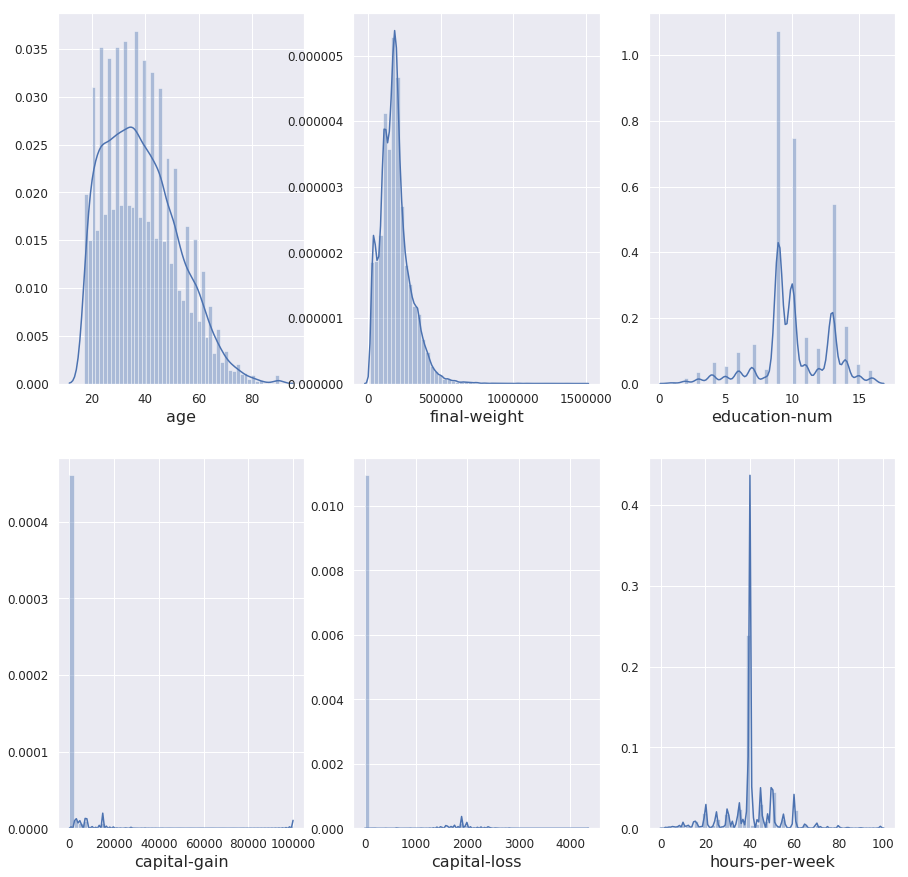

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, num_cols)

<Figure size 432x288 with 0 Axes>

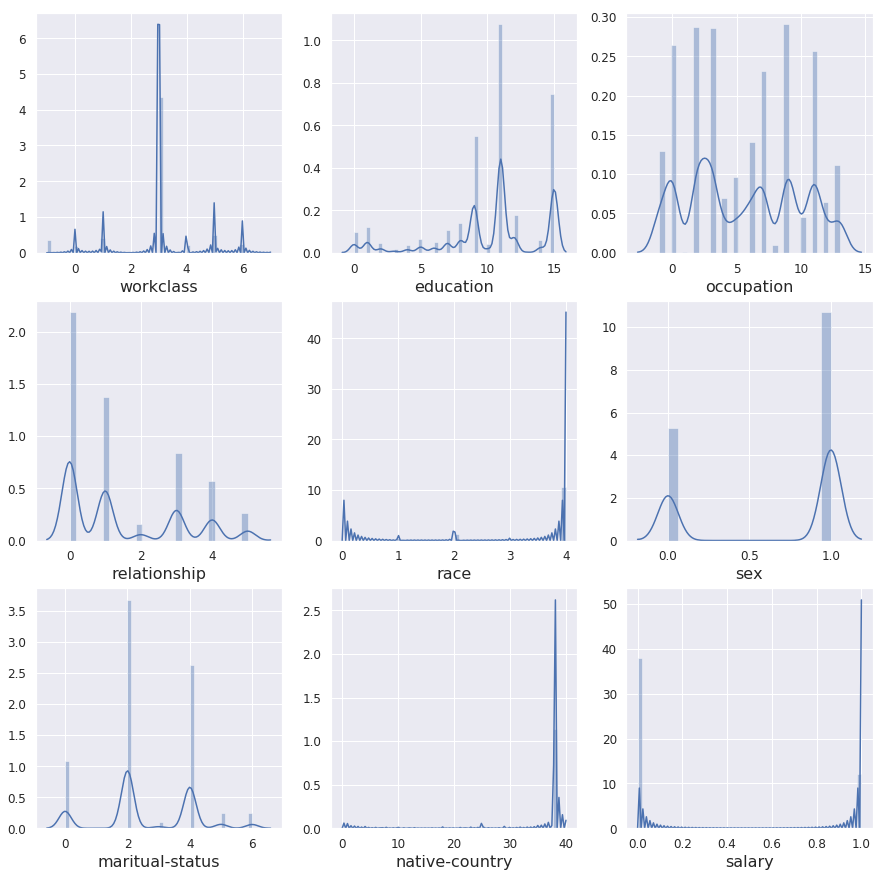

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, cat_cols)

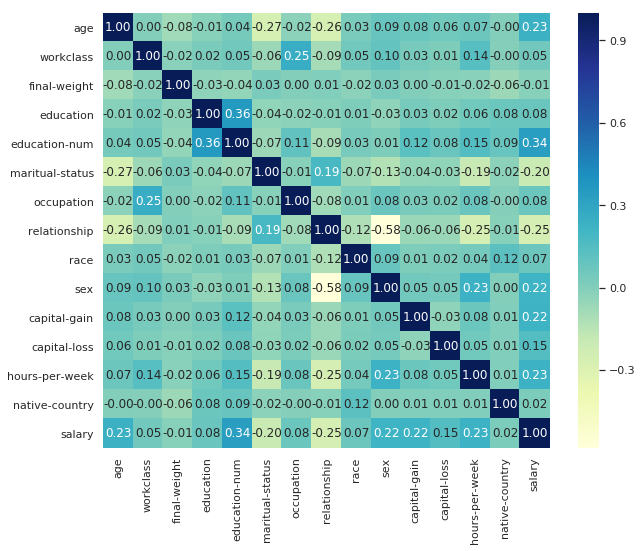

In [55]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

# Data segregation

In [0]:
X = data.loc[:, data.columns!='salary']
y = data.loc[:, data.columns=='salary']

#step 4:Modeling

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [59]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
np.arange(10, 100, 15)

array([10, 25, 40, 55, 70, 85])

In [0]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_lr = {
    'C': np.logspace(-5, 8, 15),
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,5)
}

In [0]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

#Step 5: Validation

In [63]:
randomsearch(X_train, y_train, LogisticRegression(), param_grid_lr)

{'C': 100000000.0, 'penalty': 'l1'}

In [64]:
randomsearch(X_train, y_train, DecisionTreeClassifier(), param_grid_dt)

{'criterion': 'entropy', 'min_samples_split': 17}

In [0]:
model1 = LogisticRegression(penalty='l2', C=3.727593720314938).fit(X_train, y_train)
m1_ypred = model1.predict(X_test)

model2 = DecisionTreeClassifier(min_samples_split= 12, criterion='entropy').fit(X_train, y_train)
m2_ypred = model2.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

m1_acc = accuracy_score(y_test, m1_ypred)
print(m1_acc)

print(confusion_matrix(y_test, m1_ypred))

0.8020881314294488
[[4770  215]
 [1074  454]]


In [67]:
m2_acc = accuracy_score(y_test, m2_ypred)
print(m2_acc)

print(confusion_matrix(y_test, m2_ypred))

0.8265008444649163
[[4445  540]
 [ 590  938]]


#Step 6: Communication

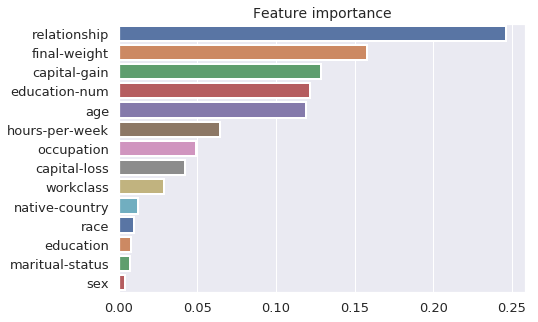

In [68]:
coef = pd.Series(model2.feature_importances_, index = X.columns)
imp_coef = coef.sort_values(ascending=False)

def plot_importance(feat_imp, feat_name):
    fig, ax = plt.subplots(figsize=(8,5)) 
    sns.set(style="darkgrid", context="poster")
    sns.barplot(feat_imp, feat_name, palette="deep")
    plt.title("Feature importance", fontsize=14)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.tight_layout()
    
plot_importance(imp_coef.values, imp_coef.index)